In [1]:
 # Importing more generic libraries
import glob
import os
import math
import csv
import ast
import collections
from collections import Counter

# Importing data structure libraries
import pandas as pd
import numpy as np

# Import graphing tools
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure that any graphs produced appears in the notebook
%matplotlib inline

# Import text analysist tools
import re
import nltk
from nltk.tokenize import RegexpTokenizer
import csv
import pandas as pd

In [2]:
# Save the dataframe into a file
# Parameters:
# data_frame_name = Name of the dataframe to save
# name_of_file    = The name of the file you want to save it as
def save_frame(data_frame_name, name_of_file):
    
    print("Begin saving dataframe into a csv.\n")
    
    name = name_of_file + ".csv"
    # Save the dataframe
    data_frame_name.to_csv(name, sep=',', encoding='utf-8')
    
    print("Finish and saved into " + name + "\n")

# Loads the dataframe from a single file. By default it skips the 1st column (this is usually the index) 
# Parameters:
# csv_file_name   = Name of the file to load
# length          = The amount of columns to load (take the amount of columns + 1)
# custom          = If you want to load in a selective column amount turn true
# colList         = Which columns you want to load
# colNames        = The names of the columns that you want to load
def read_frame(csv_file_name, length=None, custom= False, colList = None, colNames = None):
    print("Reading csv " + csv_file_name)
    name = csv_file_name + ".csv"
    
    # Load csv by specifying which ones you want 
    if custom:
        return_frame = pd.read_csv(name,  usecols = colList)
    # Load csv by length skipping the first one (index)
    else: 
        return_frame = pd.read_csv(name,  usecols = range(1,length))
    print("Finish reading " + csv_file_name + "\n")
    return return_frame

# Similar to the one before except this converts the list present in the csv back into list objects to be used
# Parameters:
# csv_file_name   = Name of the file to load
# columnNames     = The names of the columns that you want to load
# length          = The amount of columns to load (take the amount of columns + 1)
# custom          = If you want to load in a selective column amount turn true
# colList         = Which columns you want to load
def read_frame_convert_list (csv_file_name, columnNames, length=None, custom= False, colList = None):
    
    # Create the function to convert to a list
    string_to_list = lambda x: ast.literal_eval(str(x))

    # Create the converter that will convert all the columns we tell it to back to a list object
    conv = {}
    
    # Assign the converter for each column to convert
    for entry in columnNames:
        conv[entry] = string_to_list
    
    print("Reading csv " + csv_file_name)
    name = csv_file_name + ".csv"

    # Load a specified amount of columns from the csv
    if custom:
        return_frame = pd.read_csv(name,  usecols = colList,  converters=conv)
    
    # Load the csv based on length
    else: 
        return_frame = pd.read_csv(name,  usecols = range(1,length),  converters=conv)
    print("Finish reading " + csv_file_name + "\n")
    
    return return_frame

In [3]:
# Extract the links from a text
def extract_links(dataframe):
    
    # Regrex to extract all the links
    urls = re.findall(r"http\S+", dataframe['tweet'])
    
    # Replace the link with the placeholder @LINK
    dataframe['tweet'] = re.sub(r"http\S+", "@LINK", dataframe['tweet'])
    
    # Insert the URL into their own column
    if not urls:
        dataframe["URL"] = []
    else: 
        dataframe["URL"] = urls
    return dataframe
    
    
# Extract tweeter mentions in a text
def extract_mentions(dataframe):
    
    # Regrex to extract all the mentions
    mention = re.findall(r"@([A-Za-z0-9_]+)", dataframe['tweet'])
    
    # Replace the mention with the placeholder @MENTION
    dataframe['tweet'] = re.sub(r"@([A-Za-z0-9_]+)", "@MENTION", dataframe['tweet'])
    
    # Insert the mention into their own column
    if not mention:
        dataframe["MENTION"] = []
    else: 
        dataframe["MENTION"] = mention
    return dataframe

# Changes the date the declared format   
def format_date(dataframe, column_name, time_format):
    
    print("Start formatting date ")
    
    # Convert the time to date-time object
    dataframe[column_name] = pd.to_datetime(dataframe[column_name])
    
    # Convert the time to the desired format
    dataframe[column_name] = dataframe[column_name].apply(lambda x: x.strftime(time_format))  
    
    print("Finish formatting date \n") 
    
    return dataframe

In [4]:
# Start inital setup
MasterTweetFrame = pd.DataFrame(pd.read_csv('tweets_simpleZH.csv'), columns=['date','name','tweet'])

In [5]:
print("Start extracting Mentions\n")

# Extract the mentions
MasterTweetFrame = MasterTweetFrame.apply(extract_mentions, axis=1)

print("End extracting Mentions\n")
print("Start extracting URL\n")

# Extract the URLS
MasterTweetFrame = MasterTweetFrame.apply(extract_links, axis=1)

print("End Extracting URL\n")

# Format the date to use have year, month, day
MasterTweetFrame = format_date(MasterTweetFrame, "date", "%Y-%m-%d")

Start extracting Mentions

End extracting Mentions

Start extracting URL

End Extracting URL

Start formatting date 
Finish formatting date 



In [6]:
# first 5 entries of MasterTweetFrame
MasterTweetFrame[:5]

,date,name,tweet,MENTION,URL
0,2018-12-12,Ianni Leung,应该意识到，合格的、没有 #MeToo 污点的大法官至少好几位。这个单一裁决并不能洗清他是个...,[],[https://twitter.com/mranti/status/10728645358...
1,2018-12-12,womany,今年九月，麦当劳员工大动作起身抗议，呼吁麦当劳不要再漠视性骚扰案件。一起看 #MeToo 运...,[],[https://womany.net/read/article/17372?utm_cam...
2,2018-12-12,zhuoyinre,「如果洁身自爱，性侵害就不会找上你」：#Metoo 一年了，世界改变了吗？ @LINK,[],[https://ift.tt/2SJ0wlY]
3,2018-12-12,Daphne Lee,「要保护自己」原本是善意，怎么变成毒药了呢？看图了解更多！ 延伸阅读： 关于Only Yes...,[],"[https://goo.gl/5fuvHc, https://goo.gl/bVwqmk]"
4,2018-12-11,国际特赦组织中文,2018年，东亚各国推行的种种压制性措施令人忧虑，我们看见公民社会空间日渐紧缩、律师及人权捍...,[],[http://amn.st/6016EH45C]


# Graphing Functions

In [7]:
# Plot a column value over time 
# Parameters:
# column        = Columns to be used for the data
# date          = The index with the dates
# dataframe     = The dataframe of the data
# intervalValue = Set intervals for date, larger the number the bigger the interval between date stamp on graph
# saveImage     = True to save image, false to skip
# fileName      = Name of the save file
def basic_plot_generator(column, date, dataframe, saveImage=False, fileName = None):
    # Plot how many tweets there are over the whole duration
    fig,ax = plt.subplots()

    # Set title for the graph
    fig.suptitle("#metoo Movement " + column + " Over Time", fontsize="x-large")

    # Create subplot of Tweet Count over time using a the default 1 month interval
    ax.plot(pd.to_datetime(date), dataframe[column], label=column)

    
    # Set the date format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    
    # Calculate the average
    countMean = [dataframe[column].mean()]*len(pd.to_datetime(date))
    mean_line = ax.plot(pd.to_datetime(date),countMean, label='Average Overall Count', linestyle='--')

    # Create a legend for the subplot
    legend = ax.legend(loc='upper center', shadow=True)
    
    # Saving the Plot as an Image
    if saveImage:
        fig.savefig(fileName)
    
    # Show Plot
    plt.show()

# Plot different columns against eachother over time
# Parameters:
# column        = Columns to be used for the data
# date          = The index with the dates
# dataframe     = The dataframe of the data
# intervalValue = Set intervals for date, larger the number the bigger the interval between date stamp on graph
# saveImage     = True to save image, false to skip
# fileName      = Name of the save file
def plot_compare_generator(column, date, dataframe, saveImage=False, fileName = None):
    
    # Plot how many tweets there are over the whole duration
    fig,ax = plt.subplots()

    # Generate Title
    title = "Comparing #metoo Movement Sentiements: "

    # Add all columns to the title
    for element in column:
        title = title + " " + element 
    
    title = title + " Over time"
    
    # Set title for the graph
    fig.suptitle(title, fontsize="x-large")
    
    for element in column:
        # Create subplot of Tweet Count over time using a 3 month interval
        ax.plot(pd.to_datetime(date), dataframe[element], label=element)
        
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    
    # Create a legend for the subplot
    legend = ax.legend(loc='upper center', shadow=True)
    
    # Saving the Plot as an Image
    if saveImage:
        fig.savefig(fileName)
    
    # Show Plot
    plt.show()

# Examining HASHTAGS

In [8]:
# Section off the tweets into smaller chuncks and save it into csv
# Parameters:
# size            = The size of each segement of the data (if given the total size of the dataframe, it will be 1 file)
# Frame           = The dataframe to look at
# Filename        = The name of the csv (a numbering will be attached to the end of the name)
# algorithm       = The algorithm that is being chosen
# savedirectory   = The folder name to save the csv
def create_save_section(size, Frame, Filename, algorithm, savedirectory):
    
    # Create the file directory if it does not exist
    if not os.path.exists(savedirectory):
        os.makedirs(savedirectory)
    
    # Divide the dataframe into smaller chunk to work with
    # Set size of each chunk
    n = size

    #Create a list of the frame section
    FrameList = [Frame[i:i+n] for i in range(0,Frame.shape[0],n)]
    
    # Iterate through each section in the list
    for section in range(0,len(FrameList)):
        
        # Use the corresponding algorithm
        # if you want to add a new one this is where it is done
        if algorithm == 1:
            # Print debug and tokenize the text
            print("Looking at section: " + str(section+1))
            newFrame = FrameList[section].apply(tokenize_text, axis=1)
            print("Finish looking at section: " + str(section+1))
        
        if algorithm == 2:
            # Print debug and extract hashtag from dataframe
            print("Looking at section: " + str(section+1))
            newFrame = FrameList[section].apply(extract_hashtag, axis=1)
            print("Finish looking at section: " + str(section+1))
            
        if algorithm == 3:
            # Print debug and update the dictionary of categories
            print("Looking at section: " + str(section+1))
            newFrame = FrameList[section].apply(update_values_category, axis=1)
            print("Finish looking at section: " + str(section+1))
        
        # Create the name of the save location based on file and directory
        saveLocation = "./" + savedirectory + "/" + Filename 
        
        # Print debug and save the section into a csv
        print("Saving the section: " + str(section+1) + " into csv")
        newFrame.to_csv(saveLocation + "_" + str(section+1) + ".csv", sep=',', encoding='utf-8')
        print("Finish saving into " + saveLocation + "_" + str(section+1) + ".csv")
    
    print("Finised saving all the files into " + saveLocation)

In [9]:
# Extract out the hashtags and count how many there are
def extract_hashtag(dataframe):
    
    # Finds all the hashtags with regrex and capitalize them with ".upper()"
    hashtag = re.findall(r"#(\w+)", dataframe["tweet"].upper())

    # Remove all instances GAMERGATE hashtag (since all tweets has it) This includes duplicates
    # If you would like to keep them comment out the while loop
    # If you would like to remove a different hashtag you can copy the following two lines and change the word
    # Remember all tokens are capitalized
    while "METOO" in hashtag:
        hashtag.remove("METOO")

    # Insert hashtag and count into dataframe
    if hashtag:
        dataframe['HASHTAG'] = hashtag
        dataframe['count_hashtag'] = len(hashtag)
    else:
        dataframe['HASHTAG'] = []
        dataframe['count_hashtag'] = 0
        
    return dataframe

In [10]:
# Loading multiple files in a path
# This is used when all the files that you want to load are all together in a folder
# Parameters:
# path           = Path to the folder
# colSelect      = Which columns in the CSV files would you like to load
# colNames       = The names of the columns that you have selected before
# need_convert   = Check to see if we need to convert list object
# column_convert = Which columns do you need to convert
def loading_multiple_file_path(path, colSelect, colNames, need_convert=None, column_convert=None):
    
    # Load all the files
    allFiles = glob.glob(path + "/*.csv")

    # Holds all the tweets
    dataframe = pd.DataFrame()

    # Holds the individual date tweets
    dataframe= []

    # Debugs to ensure the code is working
    print("Begin reading .csv in " + path + "....\n")
    
    # Check to see if some columns need to be converted back into a list object 
    if need_convert:
        
        # Create the function to convert to a list
        string_to_list = lambda x: ast.literal_eval(str(x))

        # Create the converter that will convert all the columns we tell it to back to a list object
        conv = {}
        for entry in column_convert:
            conv[entry] = string_to_list
        
        # Read every file
        for file_ in allFiles:

            # Debugs to ensure the code is working
            print("Reading and Converting file: " + str(file_) + "....")
            df = pd.read_csv(file_,  skiprows=1, usecols=colSelect, names=colNames)

            dataframe.append(df)
    else:
        # Read every file
        for file_ in allFiles:

            # Debugs to ensure the code is working
            print("Reading file: " + str(file_) + "....")
            df = read_frame
            df = pd.read_csv(file_,  skiprows=1, usecols=colSelect, names=colNames)

            dataframe.append(df)
    
    # Debugs to ensure the code is running
    print("\nFinished reading all files in " + path + "\n")
    
    print("Merge all individual file dataframes together into a single dataframe...\n")
    dataframe = pd.concat(dataframe)
    
    print("Finished merging all the files into a single dataframe.\n" )
    
    return dataframe

# Save the dataframe into a file
# Parameters:
# data_frame_name = Name of the dataframe to save
# name_of_file    = The name of the file you want to save it as
def save_frame(data_frame_name, name_of_file):
    
    print("Begin saving dataframe into a csv.\n")
    
    name = name_of_file + ".csv"
    # Save the dataframe
    data_frame_name.to_csv(name, sep=',', encoding='utf-8')
    
    print("Finish and saved into " + name + "\n")

# Loads the dataframe from a single file. By default it skips the 1st column (this is usually the index) 
# Parameters:
# csv_file_name   = Name of the file to load
# length          = The amount of columns to load (take the amount of columns + 1)
# custom          = If you want to load in a selective column amount turn true
# colList         = Which columns you want to load
# colNames        = The names of the columns that you want to load
def read_frame(csv_file_name, length=None, custom= False, colList = None, colNames = None):
    print("Reading csv " + csv_file_name)
    name = csv_file_name + ".csv"
    
    # Load csv by specifying which ones you want 
    if custom:
        return_frame = pd.read_csv(name,  usecols = colList)
    # Load csv by length skipping the first one (index)
    else: 
        return_frame = pd.read_csv(name,  usecols = range(1,length))
    print("Finish reading " + csv_file_name + "\n")
    return return_frame

# Similar to the one before except this converts the list present in the csv back into list objects to be used
# Parameters:
# csv_file_name   = Name of the file to load
# columnNames     = The names of the columns that you want to load
# length          = The amount of columns to load (take the amount of columns + 1)
# custom          = If you want to load in a selective column amount turn true
# colList         = Which columns you want to load
def read_frame_convert_list (csv_file_name, columnNames, length=None, custom= False, colList = None):
    
    # Create the function to convert to a list
    string_to_list = lambda x: ast.literal_eval(str(x))

    # Create the converter that will convert all the columns we tell it to back to a list object
    conv = {}
    
    # Assign the converter for each column to convert
    for entry in columnNames:
        conv[entry] = string_to_list
    
    print("Reading csv " + csv_file_name)
    name = csv_file_name + ".csv"

    # Load a specified amount of columns from the csv
    if custom:
        return_frame = pd.read_csv(name,  usecols = colList,  converters=conv)
    
    # Load the csv based on length
    else: 
        return_frame = pd.read_csv(name,  usecols = range(1,length),  converters=conv)
    print("Finish reading " + csv_file_name + "\n")
    
    return return_frame

In [11]:
# Create new dataframe with information we need from MasterTweetFrame
HashtagStatisticFrame = MasterTweetFrame[['date','tweet']].copy()

# Create sections using the extract hashtag
create_save_section(10000,HashtagStatisticFrame , "HashtagStatistic", 2, "Hashtag_Stat")

# Load back the csv (Note the files are saved in a folder)
HashtagStatisticFrame = loading_multiple_file_path("./Hashtag_Stat", [1,2,3,4], ["date","tweet","HASHTAG","count_hashtag"])

# Convert the column time_stamp to an index
HashtagStatisticFrame = HashtagStatisticFrame.set_index("date")

Looking at section: 1
Finish looking at section: 1
Saving the section: 1 into csv
Finish saving into ./Hashtag_Stat/HashtagStatistic_1.csv
Finised saving all the files into ./Hashtag_Stat/HashtagStatistic
Begin reading .csv in ./Hashtag_Stat....

Reading file: ./Hashtag_Stat/HashtagStatistic_1.csv....

Finished reading all files in ./Hashtag_Stat

Merge all individual file dataframes together into a single dataframe...

Finished merging all the files into a single dataframe.



# Plotting Hashtag Graph

Simialr to before, we are going to graph some results.

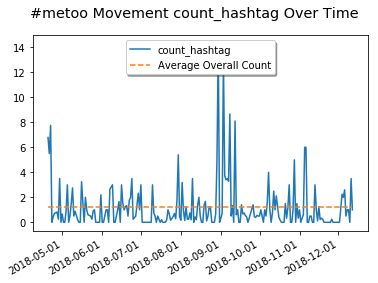

In [16]:
# Using the graph function we made we will plot these averages
HashtagGraphFrame = HashtagStatisticFrame.groupby(["date"]).mean()

for columns in HashtagGraphFrame[["count_hashtag"]]:
    basic_plot_generator(columns, HashtagGraphFrame.index, HashtagGraphFrame)

# Popular Hashtag 

We now are going to move onto examining popular hashtags. To do so we fight are going to define a simple function that can get us the occurance of a particular hashtag.

In [17]:
# Helper function that calculates what hashtag appear the most
def get_max_word(dataframe):
    
    # Calculates what is most popular
    popular = max(set(dataframe["HASHTAG"]), key=dataframe["HASHTAG"].count)
    
    # Assigns the values
    dataframe["most_popular"] = popular
    
    return dataframe

In [18]:
# Helper function that calculates what the top 10 popular hashtags
def get_top10_word(dataframe):
    
    # sort hashtags from high to low
    top10 = sorted(set(dataframe["HASHTAG"]), key=dataframe["HASHTAG"].count,reverse=True)[:10]
    
    dataframe["top10 hashtags"] = top10
    
    return dataframe
    

# Most Popular Hashtag

In [19]:
# Create a new dataframe with just HASHTAG and count
HashtagPopularFrame = HashtagStatisticFrame[["HASHTAG","count_hashtag"]].copy()

# Unset time_stamp to save
HashtagPopularFrame = HashtagPopularFrame.reset_index()

# Save Frame
save_frame(HashtagPopularFrame, "HashtagPopularFrame")

# Load back the Frame except run it under the covnerter to get a list not object
HashtagPopularFrame = read_frame_convert_list("HashtagPopularFrame", ["HASHTAG"], length = 4)

# Reset index back to date
HashtagPopularFrame = HashtagPopularFrame.set_index("date")

# Collapsing the dataframe Hashtags and Count
HashtagPopularFrame = HashtagPopularFrame[["HASHTAG","count_hashtag"]].groupby('date').agg({'HASHTAG': 'sum', 'count_hashtag': 'sum'})

# See what the result looks like
HashtagPopularFrame

Begin saving dataframe into a csv.

Finish and saved into HashtagPopularFrame.csv

Reading csv HashtagPopularFrame
Finish reading HashtagPopularFrame



,HASHTAG,count_hashtag
date,,
2018-04-20,"[励馨基金会, METOO大游行, 颜力妃, ASIAN, ASIANGIRL, ASIAN...",129
2018-04-21,"[习近平, 彭丽媛, 泛亚, 云南, NOTEARSFORARIANA, HAPPYEVER...",55
2018-04-22,"[习近平, 彭丽媛, 泛亚, 云南, NOTEARSFORARIANA, HAPPYEVER...",31
2018-04-23,[],0
2018-04-24,"[FB, 北京大学, 岳昕, PEKING]",4
2018-04-25,"[CHINA, 立法原意, 台湾旅行法, 排华法案, MAGA, BLACKLIVESMAT...",10
2018-04-26,"[比尔寇斯比, GUILTY, NOTMYANNIVERSARY, IU, MYMISTER...",10
2018-04-27,"[METOO运动领袖, 苹果日报, 女力爆发, 演唱会, YOURSTORY, 有冲撞区吗,...",9
2018-04-28,[本周热读],1


# Count hashtags

In [20]:
# Start inital setup
HashtagFrame = pd.DataFrame(pd.read_csv('HashtagPopularFrame_clean.csv'), columns=['date','HASHTAG'])

In [21]:
hashtags= ''
for row in HashtagFrame['HASHTAG']:
    hashtags = hashtags+row
hashtags

hashtags_clean = hashtags.replace('[',' ')
hashtags_clean = hashtags_clean.replace(']',' ')
hashtags_clean = hashtags_clean.replace('  ',',')
hashtags_clean = hashtags_clean.replace(' ',',')
hashtags_clean = hashtags_clean.replace(',,',',')

hashtag_split = hashtags_clean.split(',')


hashtag_list = []
for word in hashtag_split:
    hashtag_list.append(word)
hashtag_list    

['',
 "'KAVANO'",
 "'ONLYYESMEANSYES'",
 "'性侵'",
 "'我也是'",
 "'梦魔的游记'",
 "'梦魔の纪行'",
 "'催眠疗法'",
 "'喝ㄋㄟㄋㄟ'",
 "'伊藤润二'",
 "'神交'",
 "'变态医生'",
 "'今日中国报'",
 "'空姐'",
 "'香港'",
 "'米兔'",
 "'钮承泽'",
 "'钮承泽'",
 "'NIUCHENZER'",
 "'豆导'",
 "'DIRECTOR'",
 "'光头'",
 "'POLICEOFFICE'",
 "'格の违い'",
 "'钮承泽'",
 "'NIUCHENZER'",
 "'豆导'",
 "'DIRECTOR'",
 "'钮祜禄氏'",
 "'慈安太后'",
 "'钮承泽'",
 "'NIUCHENZER'",
 "'豆导'",
 "'DIRECTOR'",
 "'대만'",
 "'台湾'",
 "'TAIWAN'",
 "'台湾'",
 "'SYNCFROMMASTODON'",
 "'男性为求自保决定远离_METOO运动反使女性陷入孤立'",
 "'华尔街'",
 "'性骚扰'",
 "'NEWS'",
 "'新闻'",
 "'即时新闻'",
 "'中央社'",
 "'从此看到威士忌就反胃'",
 "'NOTME'",
 "'台湾独立'",
 "'越想越不对劲'",
 "'SYNCFROMMASTODON'",
 "'阿离'",
 "'王永森'",
 "'堕楼'",
 "'HK'",
 "'HONGKONG'",
 "'HK01'",
 "'香港01'",
 "'自由不自由'",
 "'民主不民主'",
 "'MURMURS'",
 "'HK'",
 "'我也是'",
 "'红通逃犯'",
 "'BELIEVEWOMEN'",
 "'WEDDINGHOST'",
 "'JANET珍妮'",
 "'遣散费9000万美元是什么概念'",
 "'大公司不代表都有好的公司文化'",
 "'南韩'",
 "'性骚扰'",
 "'突破汇动青年'",
 "'HK'",
 "'HONGKONG'",
 "'HK01'",
 "'香港01'",
 "'印度'",
 "'INDIA'",
 "'性侵'",
 "'SEXUALINVASION'",
 "

In [22]:
hashtag_sorted = collections.Counter(hashtag_list).most_common()
        
print  (hashtag_sorted)      


[("'泛亚'", 42), ("'CHINA'", 37), ("'米兔'", 32), ("'中国'", 31), ("'XIJINPING'", 25), ("'METOOCHINA'", 24), ("'性侵'", 22), ("'习近平'", 22), ("'WTO'", 22), ("'岳昕'", 21), ("'ABC'", 21), ("'AFP'", 21), ("'BBC'", 21), ("'CNN'", 21), ("'FT'", 21), ("'彭丽媛'", 21), ("'云南'", 21), ("'NOTEARSFORARIANA'", 21), ("'HAPPYEVERAFTER'", 21), ("'あなたに适合した武器'", 21), ("'HEATWAVE'", 21), ("'FILMSTRUCK4'", 21), ("'GOOGLE'", 20), ("'董瑶琼'", 18), ("'TRUMP'", 18), ("'FOXNEWSUS'", 18), ("'MYTAUCKLAND'", 17), ("'我也是'", 15), ("'NEWS'", 15), ("'METOOMATTERS'", 14), ("'GETONBOARDQLD'", 14), ("'U20WWC'", 14), ("'THEBACHELORAU'", 14), ("'REUTERS'", 14), ("'TVB'", 14), ("'WORLDNEWS'", 14), ("'ZTE'", 14), ("'朱军'", 13), ("'MASTERCHEFAU'", 12), ("'7NEWS'", 12), ("'CROENG'", 12), ("'韩国'", 11), ("'MUFC'", 11), ("'9NEWS'", 11), ("'GOOGLEPAY'", 11), ("'HUAWEI'", 11), ("'PANDA'", 11), ("'RFI'", 11), ("'RT'", 11), ("'SINA'", 11), ("'CCTV'", 11), ("'UN'", 11), ("'一带一路'", 11), ("'厉害了'", 11), ("'中国制造2025'", 11), ("'美中贸易战'", 11), ("'新唐人'", 1

# Tokenizing

In [23]:
import jieba
# Calculate sentence length
def tokenize_text(dataframe):
    # Calculate number of sentences
    sentence = nltk.sent_tokenize(dataframe["tweet"]) 
    dataframe['sentence'] = sentence
    dataframe['num_sentence'] = len(sentence)
    
    # Calculate length of sentences
    sentence_length = []
    tokens = []
    for line in sentence:
        
        # Set tokenizer to reconize words + the shorthand @MENTION and @LINK
        #tokenizer = RegexpTokenizer(r'\w+|@[A-Za-z0-9_-]*')
        words = (" ".join(jieba.cut(line,cut_all=False))).split() # Chinese tokenizer
   
        # Add the amount of tokens to the list 
        tokens = tokens + words
        sentence_length.append(len(words))

    # Calculate average sentence length
    dataframe['average_sentence_length'] = math.ceil(sum(sentence_length)/len(sentence_length))
        
    # Save Tokenized text
    dataframe['tokens'] = tokens
    
    # Save Token Count
    dataframe['count_tokens'] = len(tokens)
    
    return dataframe

In [24]:
TokenTweetFrame = MasterTweetFrame[['date','tweet']].copy()

# Tokenize and Save the Tweets (each section has 10000 entries) 
# 1 refers to algorithm 1 in the create_save_frame (to tokenize text)
# def create_save_section(size, Frame, Filename, algorithm, savedirectory)
create_save_section(10000, TokenTweetFrame, "TokenTweet", 1, "Tweets_Tokenize")

# Loading the csvs into a dataframe
# Since all the csv are located in "Tweets_Tokenize we can just load from there
# def loading_multiple_file_path(path, colSelect, colNames, need_convert=None, column_convert=None):
TokenTweetFrame = loading_multiple_file_path("./Tweets_Tokenize", [1,2,3,4,5,6,7], ["date","tweet","sentence","num_sentence","average_sentence_length","tokens","count_tokens"])

Looking at section: 1
Finish looking at section: 1
Saving the section: 1 into csv
Finish saving into ./Tweets_Tokenize/TokenTweet_1.csv
Finised saving all the files into ./Tweets_Tokenize/TokenTweet
Begin reading .csv in ./Tweets_Tokenize....

Reading file: ./Tweets_Tokenize/TokenTweet_1.csv....

Finished reading all files in ./Tweets_Tokenize

Merge all individual file dataframes together into a single dataframe...

Finished merging all the files into a single dataframe.



In [25]:
TokenTweetFrame[:5]

,date,tweet,sentence,num_sentence,average_sentence_length,tokens,count_tokens
0,2018-12-12,应该意识到，合格的、没有 #MeToo 污点的大法官至少好几位。这个单一裁决并不能洗清他是个...,['应该意识到，合格的、没有 #MeToo 污点的大法官至少好几位。这个单一裁决并不能洗清他...,1,64,"['应该', '意识', '到', '，', '合格', '的', '、', '没有', '...",64
1,2018-12-12,今年九月，麦当劳员工大动作起身抗议，呼吁麦当劳不要再漠视性骚扰案件。一起看 #MeToo 运...,['今年九月，麦当劳员工大动作起身抗议，呼吁麦当劳不要再漠视性骚扰案件。一起看 #MeToo...,1,34,"['今年', '九月', '，', '麦当劳', '员工', '大', '动作', '起身'...",34
2,2018-12-12,「如果洁身自爱，性侵害就不会找上你」：#Metoo 一年了，世界改变了吗？ @LINK,['「如果洁身自爱，性侵害就不会找上你」：#Metoo 一年了，世界改变了吗？ @LINK'],1,25,"['「', '如果', '洁身自爱', '，', '性', '侵害', '就', '不会',...",25
3,2018-12-12,「要保护自己」原本是善意，怎么变成毒药了呢？看图了解更多！ 延伸阅读： 关于Only Yes...,['「要保护自己」原本是善意，怎么变成毒药了呢？看图了解更多！ 延伸阅读： 关于Only Y...,1,64,"['「', '要', '保护', '自己', '」', '原本', '是', '善意', '...",64
4,2018-12-11,2018年，东亚各国推行的种种压制性措施令人忧虑，我们看见公民社会空间日渐紧缩、律师及人权捍...,['2018年，东亚各国推行的种种压制性措施令人忧虑，我们看见公民社会空间日渐紧缩、律师及人...,1,65,"['2018', '年', '，', '东亚各国', '推行', '的', '种种', '压...",65


In [26]:
tokens= ''
for row in TokenTweetFrame['tokens']:
    tokens = tokens+row.upper()


tokens_clean = tokens.replace('[',' ')
tokens_clean = tokens_clean.replace(']',' ')
tokens_clean = tokens_clean.replace('  ',',')
tokens_clean = tokens_clean.replace(' ',',')
tokens_clean = tokens_clean.replace(',,',',')
tokens_clean = tokens_clean.replace("'",'')

tokens_split = tokens_clean.split(',')


tokens_list = []
for word in tokens_split:
    tokens_list.append(word)
tokens_list    

['',
 '应该',
 '意识',
 '到',
 '，',
 '合格',
 '的',
 '、',
 '没有',
 '#',
 'METOO',
 '污点',
 '的',
 '大法官',
 '至少',
 '好几位',
 '。',
 '这个',
 '单一',
 '裁决',
 '并',
 '不能',
 '洗清',
 '他',
 '是',
 '个',
 '戏精',
 '、',
 '撒谎',
 '者',
 '、',
 '为',
 '上位',
 '无所不用其极',
 '的',
 '投机份子',
 '。',
 '况且',
 '，',
 '最',
 '关键',
 '要',
 '看',
 '，',
 '如果',
 '需要',
 '裁定',
 '「',
 '司法部',
 '能否',
 '起诉',
 '现任',
 '总统',
 '」',
 '时',
 '，',
 '他',
 '怎么',
 '站队',
 '？',
 '#',
 'KAVANO',
 '@',
 'LINK',
 '…',
 '今年',
 '九月',
 '，',
 '麦当劳',
 '员工',
 '大',
 '动作',
 '起身',
 '抗议',
 '，',
 '呼吁',
 '麦当劳',
 '不要',
 '再',
 '漠视',
 '性骚扰',
 '案件',
 '。',
 '一起',
 '看',
 '#',
 'METOO',
 '运动',
 '如何',
 '从',
 '政治',
 '、',
 '演艺圈',
 '走向',
 '蓝领阶层',
 '。',
 '@',
 'LINK',
 '…',
 '「',
 '如果',
 '洁身自爱',
 '，',
 '性',
 '侵害',
 '就',
 '不会',
 '找',
 '上',
 '你',
 '」',
 '：',
 '#',
 'METOO',
 '一年',
 '了',
 '，',
 '世界',
 '改变',
 '了',
 '吗',
 '？',
 '@',
 'LINK',
 '「',
 '要',
 '保护',
 '自己',
 '」',
 '原本',
 '是',
 '善意',
 '，',
 '怎么',
 '变成',
 '毒药',
 '了',
 '呢',
 '？',
 '看',
 '图',
 '了解',
 '更',
 '多',
 '！',
 '延伸',
 '阅读',
 '：',
 '关

In [27]:
# remove stopwords including punctuations
# import stopwords
stopwords = [line.strip() for line in open('stopwords.txt', 'r').readlines()]
removeST_tokens = []
for token in tokens_list:
    if token not in stopwords:
        if token != '\t':
            removeST_tokens.append(token)
print (removeST_tokens)

['意识', '合格', 'METOO', '污点', '大法官', '至少', '好几位', '单一', '裁决', '洗清', '戏精', '撒谎', '上位', '无所不用其极', '投机份子', '关键', '裁定', '「', '司法部', '起诉', '现任', '总统', '时', '站队', 'KAVANO', 'LINK', '九月', '麦当劳', '员工', '动作', '起身', '抗议', '呼吁', '麦当劳', '漠视', '性骚扰', '案件', 'METOO', '运动', '政治', '演艺圈', '走向', '蓝领阶层', 'LINK', '「', '洁身自爱', '性', '侵害', '找', 'METOO', '一年', '世界', '改变', 'LINK', '「', '保护', '原本', '善意', '毒药', '图', '延伸', '阅读', 'ONLY', 'YES', 'MEANS', 'YES', '忽略', '事实', 'LINK', '影片', '责怪', '被害者', 'LINK', 'METOO', 'ONLYYESMEANSYES', '性侵', 'PIC', 'TWITTER', 'COM', 'P49TMIJ31N', '2018', '年', '东亚各国', '推行', '种种', '压制性', '措施', '令人', '忧虑', '公民', '社会', '空间', '紧缩', '律师', '人权', '捍卫者', '镇压', '各国', '废除', '死刑', '进展', '悲观', 'METOO', '运动', '承认', '性伴侣', '关系', '迹象', '迈入', '2019', '年', '之际', '仍能', '曙光', 'LINK', '耶', '夜夜', '夜', '喝', 'ㄋ', 'ㄟ', 'ㄋ', 'ㄟ', '梦魔', '游记', '梦魔', 'の', '纪行', '催眠疗法', '喝', 'ㄋ', 'ㄟ', 'ㄋ', 'ㄟ', '伊藤润二', '神交', 'METOO', '变态', '医生', 'LINK', '转', '噗', '女人', '迷', 'WOMANY', '钮承泽', '事件', '后续', '回应', '媒体', '社会', '有罪', '推定',

In [28]:


tokens_sorted = collections.Counter(removeST_tokens).most_common()
        
print  (tokens_sorted) 

[('METOO', 1669), ('LINK', 910), ('「', 486), ('TWITTER', 334), ('COM', 331), ('PIC', 330), ('中国', 313), ('运动', 262), ('性骚扰', 236), ('女性', 218), ('性侵', 205), ('说', 185), ('MENTION', 177), ('事件', 120), ('中', 94), ('指控', 92), ('美国', 87), ('兔', 83), ('米', 82), ('CHINA', 82), ('侵', 81), ('受害者', 78), ('社会', 70), ('想', 70), ('媒体', 68), ('泛亚', 66), ('强奸', 65), ('年', 64), ('做', 64), ('女', 64), ('性', 62), ('朱军', 62), ('女人', 60), ('男性', 59), ('暴力', 59), ('法律', 54), ('证据', 53), ('支持', 52), ('月', 50), ('IN', 50), ('事情', 48), ('女生', 48), ('女权', 47), ('调查', 45), ('男', 44), ('里', 44), ('圈', 44), ('站', 43), ('缺', 43), ('た', 43), ('""', 42), ('郭文贵', 42), ('骚扰', 41), ('前', 41), ('学生', 40), ('发生', 40), ('真的', 40), ('男人', 40), ('P', 39), ('这是', 38), ('微博', 37), ('韩国', 35), ('性别', 35), ('政府', 35), ('勇敢', 35), ('疫苗', 35), ('政治', 34), ('话题', 34), ('遭', 34), ('国家', 34), ('侵害', 33), ('全球', 33), ('新闻', 33), ('事', 33), ('一名', 33), ('教授', 33), ('时', 32), ('自由', 32), ('有人', 32), ('岳昕', 32), ('岁', 31), ('日', 31), ('

## LDA

In [29]:
from sklearn.feature_extraction.text import CountVectorizer  

# only consider top 1000 vocabulary ordered by 
# term frequency across the entire text corpus
n_features = 1000

#vectorize text
tf_vectorizer = CountVectorizer(min_df = 2,
                                strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english')

# learn vocabulary and return term-document matrix
tf = tf_vectorizer.fit_transform(removeST_tokens)

In [40]:
from sklearn.decomposition import LatentDirichletAllocation

# set the topic counts
n_topic = 3

lda = LatentDirichletAllocation(n_components = n_topic, 
                                learning_method='online',
                                max_iter=50,
                                random_state=0)
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=3, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [41]:
# topic_distribution is a distribution of the topics in each text
topic_distribution = lda.transform(tf)

print(topic_distribution) # not normalized (sum of each row is not 1)

[[0.16674191 0.66651536 0.16674273]
 [0.33333333 0.33333333 0.33333333]
 [0.16666733 0.66666533 0.16666734]
 ...
 [0.66665997 0.16667    0.16667003]
 [0.66665991 0.16667004 0.16667006]
 [0.33333333 0.33333333 0.33333333]]


In [42]:
def print_top_words(model, feature_names, n_top_words):
    """print top terms in each topic"""
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #{}:".format(topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

# set the top n words in each topic
n_top_words=20
        
# ngrams featured in the text
tf_feature_names = tf_vectorizer.get_feature_names()

print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
twitter com pic 中国 性骚扰 性侵 事件 china 受害者 女人 证据 法律 女权 骚扰 真的 微博 国家 韩国 一名 政治
Topic #1:
metoo link 美国 泛亚 调查 发生 话题 岳昕 全球 自由 北大 丑闻 bbc 报道 公益 习近平 解决问题 2018 xijinping 世界
Topic #2:
运动 女性 mention 指控 媒体 社会 强奸 朱军 暴力 男性 支持 女生 事情 郭文贵 学生 男人 政府 这是 疫苗 教授


In [43]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

/usr/local/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.255731 -0.229737       1        1  33.413819
1     -0.332222 -0.100751       2        1  33.357352
2      0.076491  0.330488       3        1  33.228830, topic_info=     Category         Freq     Term        Total  loglift  logprob
term                                                              
62    Default  1569.000000    metoo  1569.000000  30.0000  30.0000
56    Default   853.000000     link   853.000000  29.0000  29.0000
97    Default   315.000000  twitter   315.000000  28.0000  28.0000
37    Default   312.000000      com   312.000000  27.0000  27.0000
75    Default   311.000000      pic   311.000000  26.0000  26.0000
154   Default   296.000000       中国   296.000000  25.0000  25.0000
931   Default   245.000000       运动   245.000000  24.0000  24.0000
521   Default   222.000000      性骚扰   222.000000  23.0000  23.0000
400   Default   206.000000       女性   206.000000  22.0000  22.0000
513   Default   190.000000       性侵   190.000000  21.0000  21.0000
61    Default   170.000000  mention   170.000000  20.0000  20.0000
175   Default   116.000000       事件   116.000000  19.0000  19.0000
571   Default    85.000000       指控    85.000000  18.0000  18.0000
829   Default    84.000000       美国    84.000000  17.0000  17.0000
33    Default    77.000000    china    77.000000  16.0000  16.0000
325   Default    72.000000      受害者    72.000000  15.0000  15.0000
710   Default    70.000000       泛亚    70.000000  14.0000  14.0000
427   Default    66.000000       媒体    66.000000  13.0000  13.0000
778   Default    65.000000       社会    65.000000  12.0000  12.0000
492   Default    62.000000       强奸    62.000000  11.0000  11.0000
667   Default    58.000000       朱军    58.000000  10.0000  10.0000
645   Default    58.000000       暴力    58.000000   9.0000   9.0000
753   Default    55.000000       男性    55.000000   8.0000   8.0000
391   Default    54.000000       女人    54.000000   7.0000   7.0000
893   Default    53.000000       证据    53.000000   6.0000   6.0000
707   Default    50.000000       法律    50.000000   5.0000   5.0000
598   Default    49.000000       支持    49.000000   4.0000   4.0000
410   Default    46.000000       女生    46.000000   3.0000   3.0000
179   Default    46.000000       事情    46.000000   2.0000   2.0000
405   Default    45.000000       女权    45.000000   1.0000   1.0000
...       ...          ...      ...          ...      ...      ...
931    Topic3   245.365891       运动   245.996312   1.0992  -3.0983
400    Topic3   205.633360       女性   206.263823   1.0987  -3.2750
61     Topic3   170.134382  mention   170.764934   1.0981  -3.4645
571    Topic3    85.309291       指控    85.939692   1.0944  -4.1548
427    Topic3    65.932284       媒体    66.562860   1.0922  -4.4125
778    Topic3    64.573156       社会    65.203522   1.0920  -4.4333
492    Topic3    62.241002       强奸    62.871527   1.0917  -4.4701
667    Topic3    58.070837       朱军    58.701269   1.0910  -4.5394
645    Topic3    58.068583       暴力    58.699281   1.0909  -4.5395
753    Topic3    55.289185       男性    55.919642   1.0904  -4.5885
598    Topic3    48.483041       支持    49.113469   1.0888  -4.7199
410    Topic3    45.638800       女生    46.269289   1.0880  -4.7803
179    Topic3    45.578196       事情    46.208682   1.0880  -4.7817
957    Topic3    44.244758      郭文贵    44.875846   1.0876  -4.8113
432    Topic3    38.805383       学生    39.435990   1.0856  -4.9425
747    Topic3    37.542113       男人    38.172571   1.0851  -4.9756
604    Topic3    37.008434       政府    37.639454   1.0848  -4.9899
941    Topic3    36.421562       这是    37.052093   1.0846  -5.0059
757    Topic3    34.756771       疫苗    35.387443   1.0838  -5.0527
612    Topic3    33.025153       教授    33.655912   1.0828  -5.1038
278    Topic3    32.884957       勇敢    33.515397   1.0828  -5.1081
515    Topic3    32.684983       性别    33.315405   1.0826  -5.1142
62

# Sentiment Analysis

In [28]:
# import textblob for sentiment analysis

from snownlp import SnowNLP
# import a list of pre-defined stopwords
stopwords = [line.strip() for line in open('stopwords.txt', 'r').readlines()]


def sentiment(dataframe):
    
    # 
    SentStatisticFrame = dataframe[['date','tweet']].copy()
    SentStatisticFrame["sent"]=''

    
   
    for row in SentStatisticFrame.iterrows(): 

        #sent = SnowNLP(row[1]['tweet'])
        row_removeST=' '.join([word for word in row[1]['tweet'].split() if word not in stopwords])
        sent = SnowNLP(row_removeST)
        
        if sent.sentiments > 0.9:
            row[1]['sent']= "pos"

        elif sent.sentiments <0.3:
            row[1]['sent']= "neg"

        else:
            row[1]['sent']= "neu"
            
              
    return SentStatisticFrame

In [29]:

sent_dataframe = sentiment(MasterTweetFrame)
sent_day = sent_dataframe.groupby(['date','sent']).size().reset_index(name='Size')

sent_day

,date,sent,Size
0,2018-04-20,neg,13
1,2018-04-20,neu,4
2,2018-04-20,pos,2
3,2018-04-21,neg,7
4,2018-04-21,neu,1
5,2018-04-21,pos,2
6,2018-04-22,neg,4
7,2018-04-23,neu,3
8,2018-04-23,pos,3
9,2018-04-24,neg,3


In [30]:
sent_day_cross = sent_day.pivot_table(index=['date','sent'])
sent_day_cross.pivot_table(index='date',columns='sent')

Size           
sent         neg  neu   pos
date                       
2018-04-20  13.0  4.0   2.0
2018-04-21   7.0  1.0   2.0
2018-04-22   4.0  NaN   NaN
2018-04-23   NaN  3.0   3.0
2018-04-24   3.0  2.0   4.0
2018-04-25   1.0  1.0  12.0
2018-04-26   3.0  2.0   8.0
2018-04-27   4.0  2.0   5.0
2018-04-28   1.0  NaN   3.0
2018-04-29   1.0  1.0   NaN
2018-04-30   2.0  1.0   1.0
2018-05-01   1.0  1.0   1.0
2018-05-02   1.0  NaN   NaN
2018-05-03   NaN  1.0   3.0
2018-05-04   1.0  1.0   7.0
2018-05-05   NaN  NaN   1.0
2018-05-06   1.0  NaN   NaN
2018-05-07   1.0  1.0   NaN
2018-05-08   1.0  2.0   1.0
2018-05-09   1.0  3.0   NaN
2018-05-10   2.0  1.0   3.0
2018-05-11   NaN  1.0   7.0
2018-05-13   1.0  3.0   1.0
2018-05-14   NaN  1.0   NaN
2018-05-15   NaN  NaN   1.0
2018-05-16   2.0  NaN   2.0
2018-05-18   1.0  NaN   2.0
2018-05-19   1.0  1.0   NaN
2018-05-20   NaN  NaN   1.0
2018-05-21   NaN  2.0   3.0
...          ...  ...   ...
2018-11-08   NaN  NaN   2.0
2018-11-09   NaN  NaN   2.0
2018-11-10   3.0  1.0   NaN
2018-11-11   1.0  NaN   NaN
2018-11-12   NaN  NaN   2.0
2018-11-13   NaN  NaN   1.0
2018-11-14   NaN  NaN   1.0
2018-11-15   2.0  4.0   3.0
2018-11-16   1.0  1.0   6.0
2018-11-17   1.0  3.0   5.0
2018-11-18   1.0  NaN   2.0
2018-11-19   NaN  2.0   2.0
2018-11-20   1.0  NaN   NaN
2018-11-21   NaN  1.0   NaN
2018-11-22   1.0  NaN   NaN
2018-11-24   1.0  1.0   NaN
2018-11-25   NaN  NaN   1.0
2018-11-26   1.0  2.0   1.0
2018-11-27   NaN  2.0   1.0
2018-11-29   NaN  NaN   1.0
2018-12-02   NaN  2.0   1.0
2018-12-04   1.0  NaN   3.0
2018-12-05   1.0  NaN   3.0
2018-12-06   NaN  2.0   3.0
2018-12-07   NaN  NaN   2.0
2018-12-08   1.0  NaN   NaN
2018-12-09   NaN  3.0   NaN
2018-12-10   NaN  NaN   4.0
2018-12-11   1.0  NaN   1.0
2018-12-12   1.0  1.0   2.0

[218 rows x 3 columns]

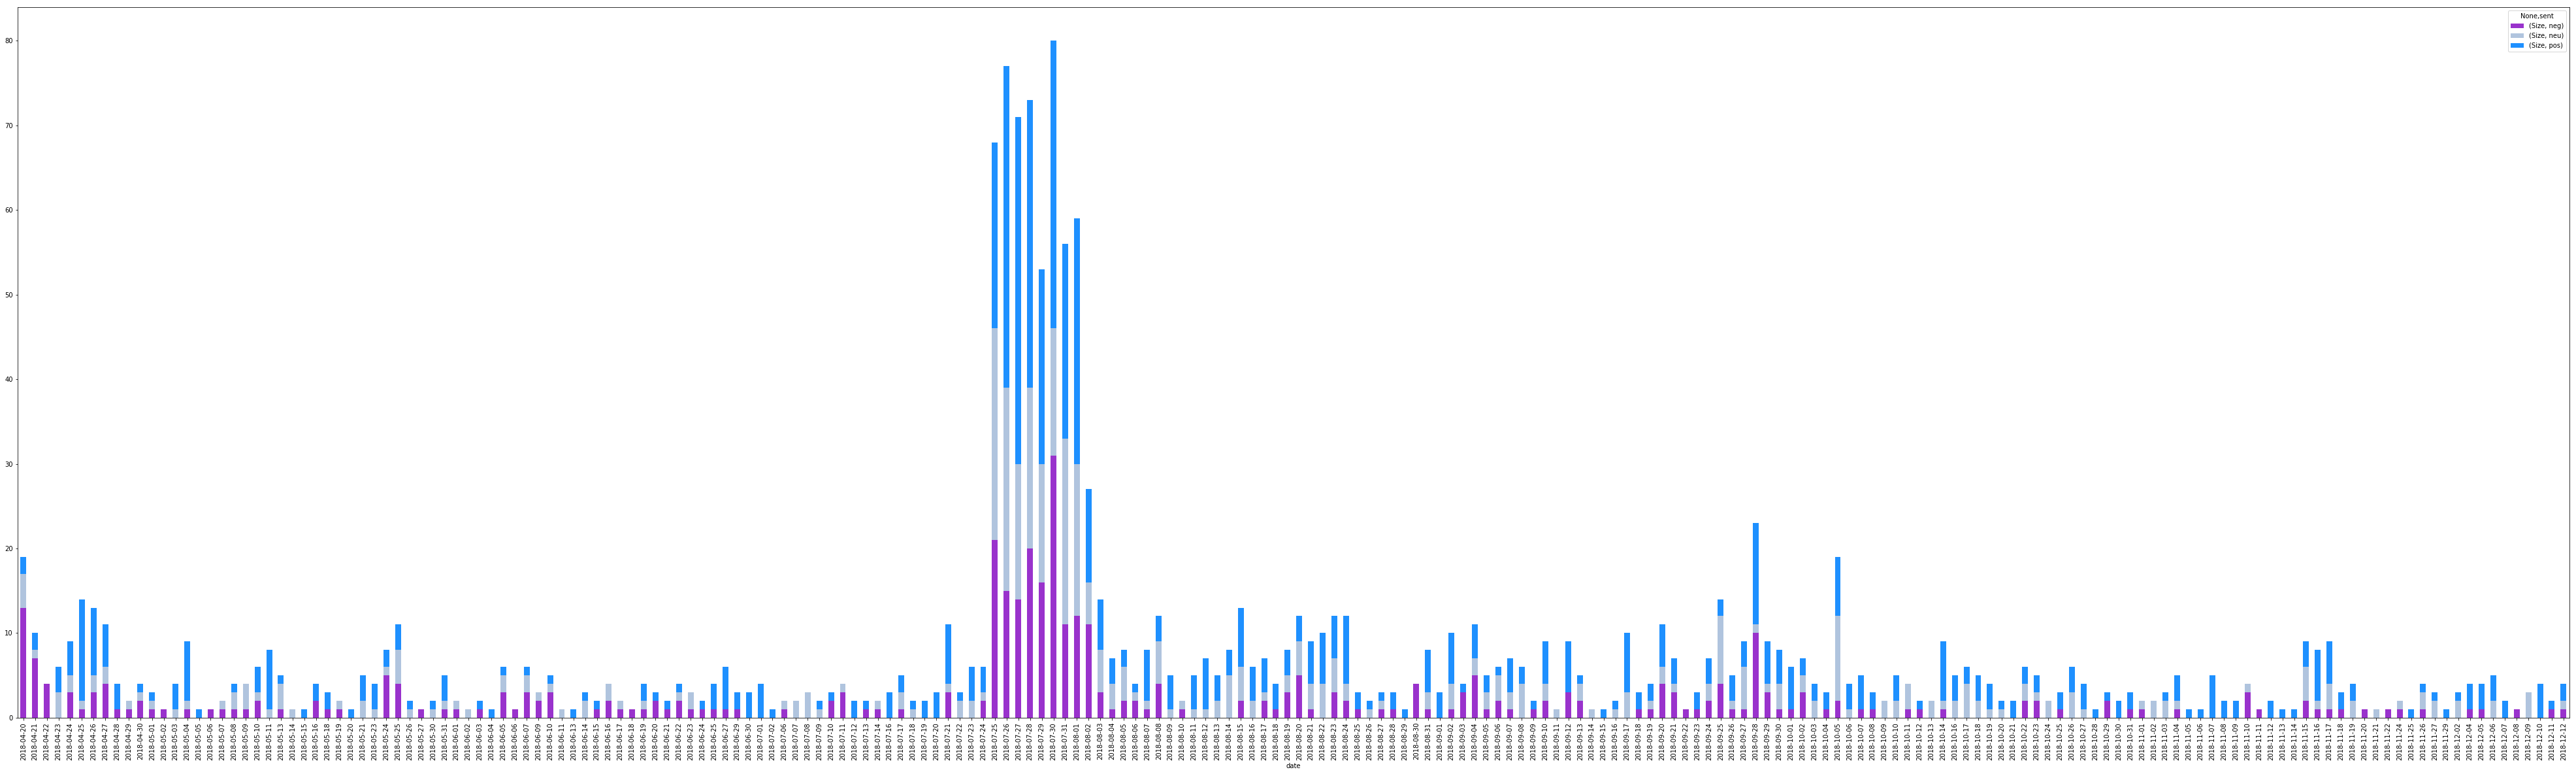

In [202]:
# plot the sentiment table
sent_day_cross.pivot_table(index='date',columns='sent').plot(figsize=(70, 20),kind='bar',color=('darkorchid', 'lightsteelblue', 'dodgerblue'),stacked=True)
plt.savefig('output0.9-0.3_removeST.png', dpi=300)

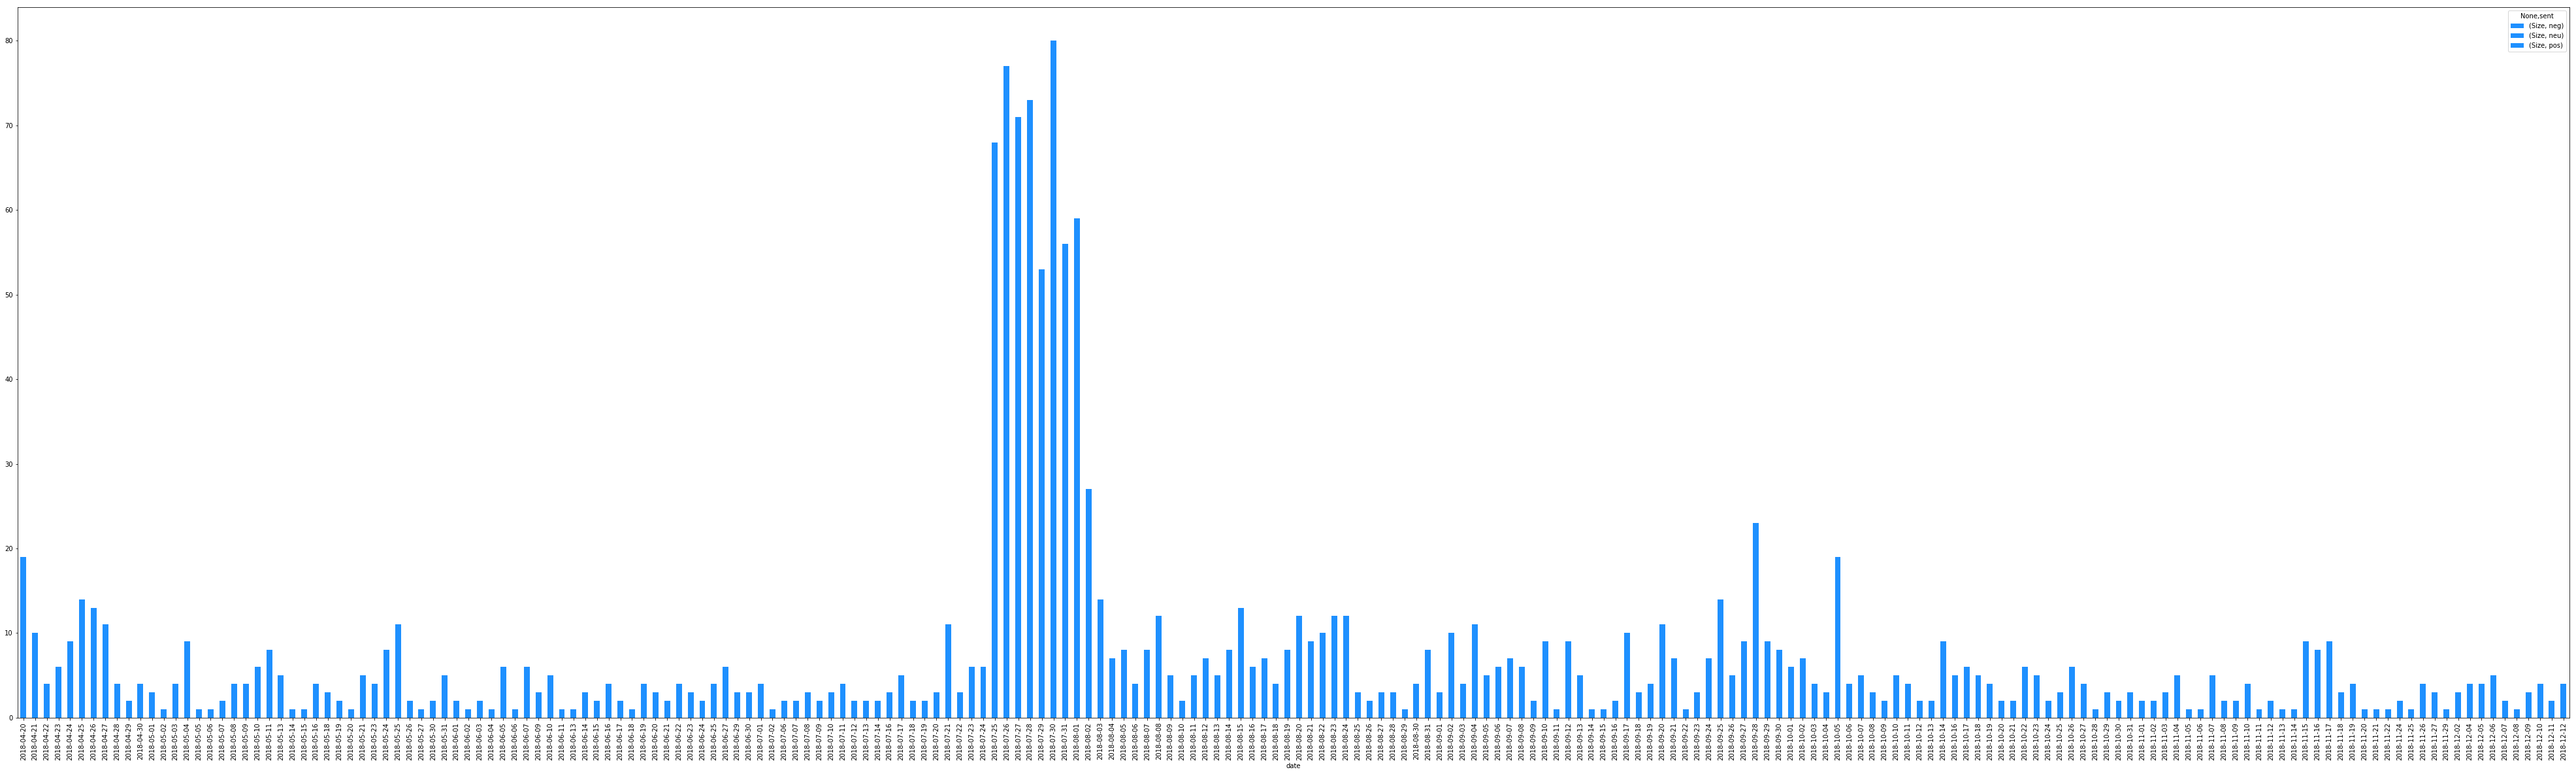

In [31]:
# plot the sentiment table
sent_day_cross.pivot_table(index='date',columns='sent').plot(figsize=(70, 20),kind='bar',color=('dodgerblue', 'dodgerblue', 'dodgerblue'),stacked=True)
plt.savefig('twitteraccount.png', dpi=300)